In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df['age'] = df.Rings + 1.5
print("Data loaded Successfully!")

Data loaded Successfully!


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 2.5,  5.3,  8.1, 10.9, 13.7, 16.5, 19.3, 22.1, 24.9, 27.7, 30.5]),
 <BarContainer object of 10 artists>)

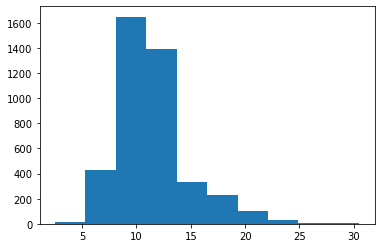

In [6]:
plt.hist(df['age'])

Text(0, 0.5, 'age')

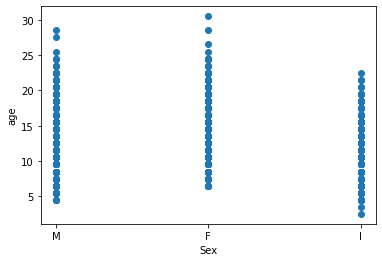

In [7]:
plt.scatter(df.Sex, df.age)
plt.xlabel('Sex')
plt.ylabel('age')

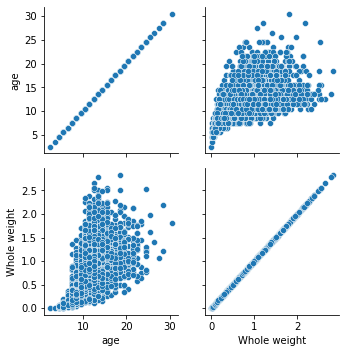

In [8]:
g = sns.PairGrid(df, vars=["age", "Whole weight"], )
g.map(sns.scatterplot)

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [10]:
df.isna().mean().to_frame(name='% of missing values')

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
Rings,0.0
age,0.0


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

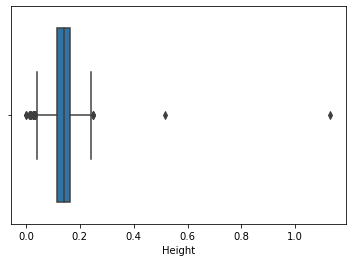

In [11]:
sns.boxplot(df['Height'],data=df)

In [12]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Height']=np.where(df['Height']>upper_whisker,upper_whisker,np.where(df['Height']<lower_whisker,lower_whisker,df['Height']))

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

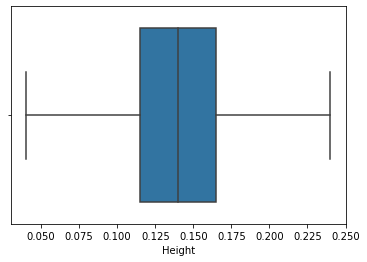

In [13]:
sns.boxplot(df['Height'],data=df)

In [14]:
new_df=df.copy()
new_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [15]:
categorical = df.select_dtypes(include=['object']).copy()
categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in categorical:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 326.5 KB
None


In [17]:
new_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [18]:
new_df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5


In [19]:
X = new_df.iloc[:, :-1].values
print(X)

[[ 2.      0.455   0.365  ...  0.101   0.15   15.    ]
 [ 2.      0.35    0.265  ...  0.0485  0.07    7.    ]
 [ 0.      0.53    0.42   ...  0.1415  0.21    9.    ]
 ...
 [ 2.      0.6     0.475  ...  0.2875  0.308   9.    ]
 [ 0.      0.625   0.485  ...  0.261   0.296  10.    ]
 [ 2.      0.71    0.555  ...  0.3765  0.495  12.    ]]


In [20]:
y= new_df.iloc[:,3].values
print(y)

[0.095 0.09  0.135 ... 0.205 0.15  0.195]


In [34]:

from sklearn.model_selection import train_test_split, cross_val_score


In [35]:
train_X,val_X,train_y,val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (3341, 9)
Shape of Validation X : (836, 9)


In [37]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (3341,)
Shape of Validation y : (836,)


In [43]:
lr = LinearRegression()
lr.fit(train_X,train_y)


LinearRegression()

In [44]:
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")


MAE on Validation set : 1.667077560526037e-16


MSE on Validation set : 2.9657305367604894e-32


RMSE on Validation set : 1.2911535774360992e-08


R2 Score on Validation set : 1.0




In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)



DecisionTreeRegressor(random_state=0)

In [47]:
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print("\n")

MAE on Validation set : 2.2040948279695748e-16


MSE on Validation set : 7.802348815520329e-32


RMSE on Validation set : 1.4846194219292616e-08


R2 Score on Validation set : 1.0


